In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from highlight_text import fig_text, ax_text
from mplsoccer import Bumpy

In [2]:
report_words_clean = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-03-25/report_words_clean.csv")

In [3]:
report_words_clean.head(2)

,year,word
0,2005,shareholders
1,2005,decisions


In [4]:
report_words_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411626 entries, 0 to 411625
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   year    411626 non-null  int64 
 1   word    411626 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.3+ MB


In [5]:
report_words_clean.year.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2021, 2022, 2023, 2019, 2020])

In [6]:
report_words_clean.word.nunique()

7723

In [7]:
action_verbs = report_words_clean[report_words_clean["word"].str.endswith("ed")]

In [8]:
top10 = action_verbs.groupby(["word"])["word"].value_counts().reset_index().sort_values(by=["count"], ascending=False)[:10]
words = top10["word"].tolist()

In [9]:
def rank_top_action_verbs(df, word_list):    
    word_counts = df.groupby(["year", "word"]).size().reset_index(name="count")       
    word_counts["rank"] = word_counts.groupby("year")["count"].rank(method="first", ascending=False).astype(int)      
    result = word_counts[word_counts["word"].isin(words)][["year", "word", "rank"]]    
    return result

In [10]:
result = rank_top_action_verbs(action_verbs, words)

In [11]:
df = pd.pivot(result, index="year", columns="word", values="rank")

In [12]:
df.head()

word,acquired,based,consolidated,deferred,estimated,fixed,included,recorded,related,required
year,,,,,,,,,,
2005,28,1,2,4,10,6,7,5,3,8
2006,18,2,1,5,11,4,6,7,3,8
2007,11,2,1,5,7,4,6,10,3,8
2008,5,2,1,8,7,4,6,12,3,9
2009,5,2,1,9,7,4,8,13,3,11


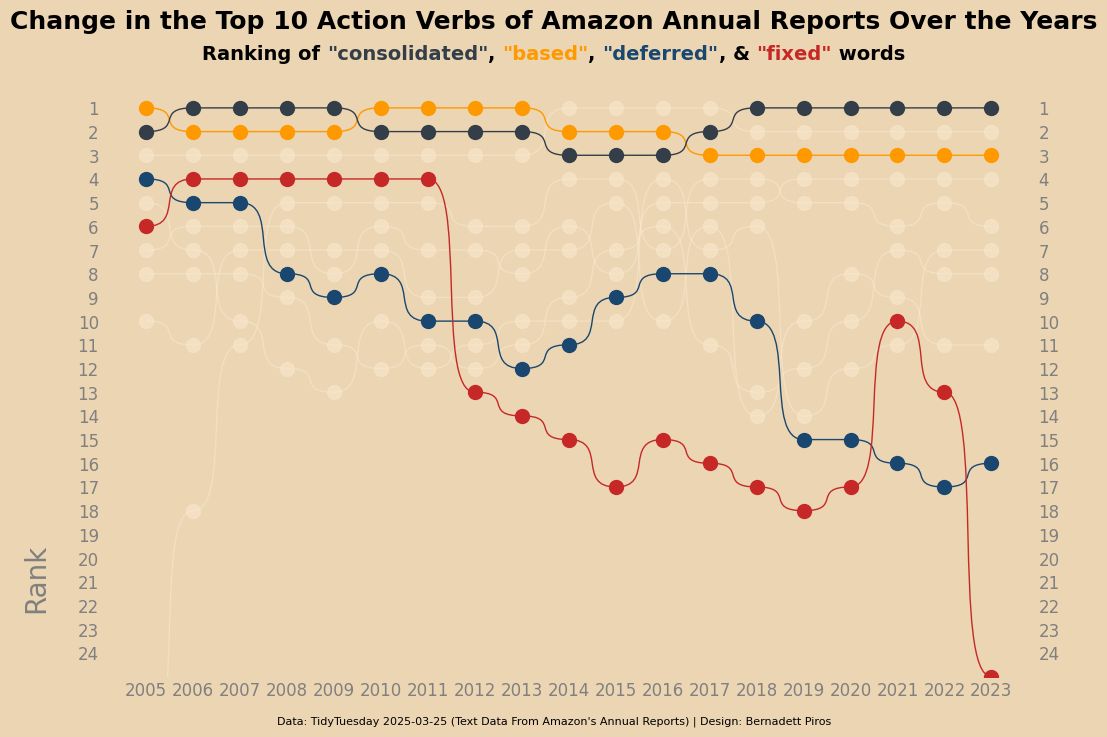

In [13]:
highlight_dict = {
    'based':'#FF9900',
    'consolidated':'#333E48',
    'deferred':'#1A476F',
    'fixed': '#C62828'
}

bumpy = Bumpy(
    background_color = '#ebd5b3',
    scatter_color = '#FBEACF',
    line_color = '#FBEACF',    
    ticklabel_size = 12,
    scatter_primary = 'o',
    show_right = True,
    plot_labels = True,    
    label_color = 'grey',
)

fig, ax = bumpy.plot(
    x_list = df.index,
    y_list = np.linspace(1, 24, 24).astype(int),
    values = df,
    secondary_alpha = 0.5,
    highlight_dict = highlight_dict,    
    y_label = 'Rank',
    ylim = (0, 26),
    lw = 1
)

fig.text(s = "Change in the Top 10 Action Verbs of Amazon Annual Reports Over the Years",x = 0.5, y = 0.92,
         color='black', size=18, weight='bold', ha='center'
        )

fig_text(x=0.5, y=0.9, 
         s = 'Ranking of <"consolidated">, <"based">, <"deferred">, & <"fixed"> words',
         highlight_textprops = [
                           {"color":'#333E48'},
                           {"color":'#FF9900'},
                           {"color":'#1A476F'},
                           {"color":'#C62828'}
                       ],
                        fontsize = 14,
                        weight='bold',
                        color = 'black',
                        ha='center' 
        )

fig.text(0.5, 0.05, "Data: TidyTuesday 2025-03-25 (Text Data From Amazon's Annual Reports) | Design: Bernadett Piros", ha="center", color="black", size=8)

plt.show()

#fig.savefig("2025-03-25.png", bbox_inches='tight', pad_inches=0.2)